In [17]:
#PART 1 of HW2. Using the memorization algorithm to calculate the nth fib number.
#Input: Integer n
#Output: Integer table[n] which contains the nth fib number.
def fib4(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n == 1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib4(n-1, table) + fib4(n-2, table)
    return table[n]

#Main portion of program for part 1
n=20 #Nth fib to calcualte
table = [None]*(n+1) #Initialize table array
store = [0] * (n+1) #Initialize storing array
for x in range(2, n+1):  #For-loop to calculate all the fib numbers ranging from [2, n+1]
    store[x] = (fib4(x, table)/ fib4(x-1, table)) #Keep table to graph
    #print (store[x])
print("Finish")

Finish


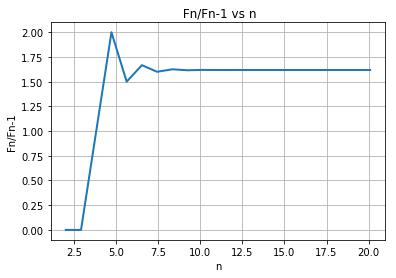

In [19]:
#Final Graph for PART 1 (Fn/Fn-1 vs n)
from pylab import * 

Xmin = 2; Xmax = n+1; Npoints = n+1
DelX = (Xmax - Xmin)/Npoints
x = arange(Xmin, Xmax, DelX)
y = store

xlabel('n');      ylabel('Fn/Fn-1');     title(' Fn/Fn-1 vs n')        # labels
plot(x, y, '-', lw=2)                                 # dash means it is a line                     
grid(True)                                                    # Form grid
show() 
#print("Finish")

In [20]:
#PART 2 of HW2.
#Using the tabulation method
#Input: integer n
#Output: nth fib number
def fib1(n):      
    table=[0]*(n+1) #Initialize array table
    table[1] = 1 #Set F0 and F1
    
    for i in range(2,n+1): 
        table[i]=table[i-1]+table[i-2]
    return table[n]

#Using the array multiplication method
#Input: a 2x2 matrix namely arr and the nth fib number to be calculated
#Output: an array which contains the nth fib number
def arrpow(arr, n): # calculate 2x2 array to the nth power.
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]], # array multiply itself
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:   # if n is an odd number, multiple another arr
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib2(n):   # the fastest method
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]  #0 0 component is Fn#
    return f

#Using the iterative method
#Input: an integer n
#Output: the nth fib number
def fib3(n): 
    if(n <= 1):
        return n
    temp = 0 #Store temp values to iterate to correct fib number
    fib_previous = 1 #Second Fib number
    fib_next = 1 #Third Fib number
    for x in range(2, n):
        temp = fib_next 
        fib_next += fib_previous
        fib_previous = temp
    return fib_next
        

#Main portion of program for part 2
import time 
power = 5 #Power to be applied
power_one = power+1
base = 10 #Base
fib1_time = [0] * power_one #Stores computation time for tabulation method
fib2_time = [0] * power_one #Stores computation time for array multiplication method
fib3_time = [0] * power_one #Stores computation time for iterative method
fib1_values = [0] * power_one #Stores values of fib for tabulation method
fib2_values = [0] * power_one #Stores values of fib for tabulation method
fib3_values = [0] * power_one #Stores values of fib for tabulation method
for x in range(1,power_one):
    #print("working")
    start_time = time.time() #Initialize time for algorithm fib1
    fib1_values[0] = 1 #Initialize first slot in the index
    fib1_time[0] = 0
    fib1_values[x] = fib1(base**x)
    fib1_time[x] = (time.time() - start_time)
    
for x in range(1,power_one):
   # print("working2")
    start_time = time.time() #Initialize time for algorithm fib2
    fib2_values[0] = 1 #Initialize slot in the index
    fib2_time[0] = 0
    fib2_values[x] = fib2(base**x)
    fib2_time[x] = (time.time() - start_time)
    
for x in range(1, power_one):
    #print("working3")
    start_time = time.time() #Initialize time for algorithm fib3
    fib3_values[0] = 1 #Initialize slot in the index
    fib3_time[0] = 0 
    fib3_values[x] = fib3(base**x)
    fib3_time[x] = (time.time() - start_time)

ofile = open('HW2_Datafile', 'w')
s1_values = ' '.join(str(x) for x in fib1_values)
s1_time = ' '.join(str(x) for x in fib1_time)
s2_values = ' '.join(str(x) for x in fib2_values)
s2_time = ' '.join(str(x) for x in fib2_time)
s3_values = ' '.join(str(x) for x in fib3_values)
s3_time = ' '.join(str(x) for x in fib3_time)

ofile.write(s1_values)
ofile.write('\n')
ofile.write(s1_time)
ofile.write('\n')
ofile.write(s2_values)
ofile.write('\n')
ofile.write(s2_time)
ofile.write('\n')
ofile.write(s3_values)
ofile.write('\n')
ofile.write(s3_time)
ofile.write('\n')
ofile.close()

#print(fib1_time)
#print(fib2_time)
#print(fib3_time)
#print(fib1_values)
#print(fib2_values)
#print(fib3_values)
print("Finish")

Finish


In [21]:
#Routine for reading from the previously written file
#Begin by initializing new lists for both times and fib numbers
fib1_outtime = [0] * power_one 
fib2_outtime = [0] * power_one
fib3_outtime = [0] * power_one
fib1_outvalue = [0] * power_one
fib2_outvalue = [0] * power_one
fib3_outvalue = [0] * power_one
        
my_int_list = [double(v) for v in open('HW2_Datafile').read().split()]
fib_log = [0] * power_one

for x in range(0, power_one):
    fib_log[x] = x

for x in range(0, power_one):
    fib1_outvalue[x] = my_int_list[x]

for x in range(power_one, 2*power_one):
    fib1_outtime[x - power_one] = my_int_list[x]

for x in range(2*power_one, 3*power_one):
    fib2_outvalue[x - 2*power_one] = my_int_list[x]
    
for x in range(3*power_one, 4*power_one):
    fib2_outtime[x - 3*power_one] = my_int_list[x]
    
for x in range(4*power_one, 5*power_one):
    fib3_outvalue[x - 4*power_one] = my_int_list[x]
    
for x in range(5*power_one, 6*power_one):
    fib3_outtime[x - 5*power_one] = my_int_list[x]

#print(fib_log)
#print(fib1_outvalue)
#print(fib1_outtime)
#print(fib2_outvalue)
#print(fib2_outtime)
#print(fib3_outvalue)
#print(fib3_outtime)
print("Finish")

Finish


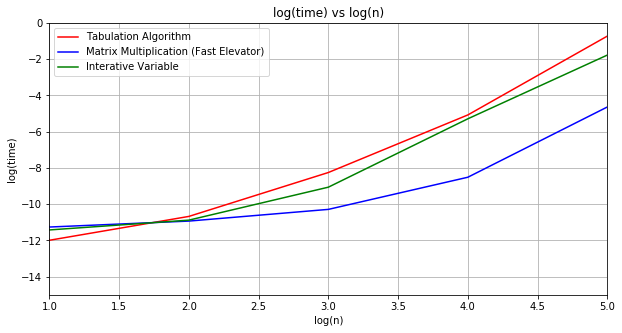

In [22]:
#Final Graph for PART 2 (log(time) vs log(n)) for 
import matplotlib.pyplot as plt
from math import sin, cos, pi

npoints=50
last_value = int(power_one)
y1 = [0] * power_one
y2 = [0] * power_one
y3 = [0] * power_one

for i in range (0, power_one):
    if(i == 0):
        y1[i] = 0
    if(i > 0):
        y1[i] = log(fib1_outtime[i])

for i in range (0, power_one):
    if(i == 0):
        y2[i] = 0
    if(i > 0):
        y2[i] = log(fib2_outtime[i])

for i in range (0, power_one):
    if(i == 0):
        y3[i] = 0
    if(i > 0):
        y3[i] = log(fib3_outtime[i])
        
x = fib_log
plt.figure(figsize=(10, 5))
plt.title('log(time) vs log(n)')
plt.xlabel('log(n)')
plt.ylabel('log(time)')
plt.grid(True)
plt.xlim(1,last_value - 1)
plt.ylim(-15, 0)
 
plt.plot(x, y1, color="red", label="Tabulation Algorithm")
plt.plot(x, y2, color="blue", label="Matrix Multiplication (Fast Elevator)")
plt.plot(x, y3, color="green", label="Iterative Variable")
plt.legend()
plt.show()